## Exercise 3: Semantic Clustering with Text Embeddings

In this exercise, you will evaluate how **different text embedding models and clustering algorithms** affect cluster quality and interpretability.

### Tasks

#### 1. Corpus preparation
- Find **~10 short texts**, such as:
  - news headlines,
  - short news paragraphs,
  - abstracts or encyclopedia snippets.
- Ensure the texts span **at least 3–5 domains**.
- Save them on disk or into a list.

#### 2. Embedding model selection
- Use the **Hugging Face ecosystem** for embedding models. Suggestions: https://huggingface.co/Qwen/Qwen3-Embedding-0.6B or https://huggingface.co/BAAI/bge-m3  
- You will also find relevant models on https://sbert.net/

#### 3. Embedding generation
- Encode all texts using each selected model.

#### 4. Clustering algorithm selection
- Perform clustering using standard libraries (e.g. `scikit-learn`). Apply **at least two** different clustering algorithms, such as:
  - **k-means** (fixed number of clusters),
  - **DBSCAN** (density-based, no fixed *k*).

#### 5. Results comparison
- For each *(embedding model × clustering algorithm)* combination:
  - inspect cluster assignments,
- Compare results along:
  - semantic coherence,
  - separation between clusters,
  - sensitivity to hyperparameters.
- Try to adjust clustering hyperparameters to get better results.

#### 6. Improve results
- Experiment with dimensonality reduction technique, e.g. PCA, and report if they improve the results.


In [ ]:
!pip install -U "transformers==4.56.2"
!pip install -U "FlagEmbedding"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.3/566.3 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.3.4
    Uninstalling huggingface_hub-1.3.4:
      Successfully uninstalled huggingface_hub-1.3.4
  Attempting uninstall: transformers
    Found existing installation: transformers 5.0.0
    Uninstalling transformers-5.0.0:
      Successfully uninstalled transformers-5.0.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.1/866.1 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
texts = [
    "By 11 a.m., voter turnout was higher than in the first round.",
    "By 10 a.m., there were 47 reports of alleged violations of the election silence.",
    "After seven percent of the votes were counted, Nataša Pirc Musar is in the lead.",
    "On Wednesday, 1469 new coronavirus infections were confirmed.",
    "Statistical overview of the coronavirus situation in Slovenia.",
    "The number of new coronavirus infections is slowly rising again.",
    "Avocado Toast: Toast bread, mash avocado with salt and lemon juice, spread on toast and serve.",
    "Aglio e Olio Pasta: Boil pasta, sauté garlic in olive oil with chili flakes, toss pasta with the oil and salt to taste.",
    "Banana Smoothie: Blend banana, milk, and a little honey until smooth and creamy.",
    "The bus was supposed to end its route at midnight, but tonight it didn’t. One by one, sleepy passengers realized their stops had vanished from the window, replaced by streets they’d never seen. The driver never turned around, just hummed softly as the bus rolled on. When the doors finally opened, everyone stepped off feeling lighter—like they’d left something heavy behind on the seats.",
    "Every morning, the same old bus arrived late, and every morning, Seat 17B was empty—except today. A woman sat there smiling, holding a bouquet of paper tickets. When the bus hit a bump, she disappeared, leaving the tickets behind. The driver later said Seat 17B was reserved for memories that hadn’t finished their commute yet.",
    "This bus talked, but only when it was raining. It complained about potholes, praised good umbrellas, and gently reminded passengers to call their mothers. Most people thought the thunder caused the noise. One kid listened closely and waved goodbye at his stop. The bus said, “Good luck,” and meant it."
]



In [ ]:
#Qwen3-Embedding-0.6B
from sentence_transformers import SentenceTransformer
# Load the model
model = SentenceTransformer("Qwen/Qwen3-Embedding-0.6B")
# Compute embeddings
qwen_embeddings = model.encode(texts)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.19G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

In [ ]:
#BGEM3
from FlagEmbedding import BGEM3FlagModel
# Load the model
model = BGEM3FlagModel('BAAI/bge-m3',  use_fp16=True)
# Compute embeddings
bgem3_embeddings = model.encode(texts, return_dense=True, return_sparse=False, return_colbert_vecs=False)["dense_vecs"]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

.DS_Store:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

bm25.jpg:   0%|          | 0.00/132k [00:00<?, ?B/s]

long.jpg:   0%|          | 0.00/485k [00:00<?, ?B/s]

colbert_linear.pt:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

mkqa.jpg:   0%|          | 0.00/608k [00:00<?, ?B/s]

miracl.jpg:   0%|          | 0.00/576k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

long.jpg:   0%|          | 0.00/127k [00:00<?, ?B/s]

nqa.jpg:   0%|          | 0.00/158k [00:00<?, ?B/s]

others.webp:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

Constant_7_attr__value:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

onnx/model.onnx:   0%|          | 0.00/725k [00:00<?, ?B/s]

onnx/model.onnx_data:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

onnx/tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

sparse_linear.pt:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:

#Kmeans clustering
from sklearn.cluster import KMeans

#determine hyperparameters
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=3
    )

#predict clusters for both models
qwen_clusters = kmeans.fit_predict(qwen_embeddings)
bgem3_clusters = kmeans.fit_predict(bgem3_embeddings)


#observe which sentences are assigned to each cluster
def print_kmeans_clusters(name, clusters, texts, n_clusters):
    print(f"\n{'='*10} {name} {'='*10}")
    for cid in range(n_clusters):
        print(f"\n{name} – Cluster {cid}:")
        for text, label in zip(texts, clusters):
            if label == cid:
                print(f" - {text}")

print_kmeans_clusters("Qwen", qwen_clusters, texts, kmeans.n_clusters)
print_kmeans_clusters("BGEM3", bgem3_clusters, texts, kmeans.n_clusters)


========== Qwen ==========

Qwen – Cluster 0:
 - On Wednesday, 1469 new coronavirus infections were confirmed.
 - Statistical overview of the coronavirus situation in Slovenia.
 - The number of new coronavirus infections is slowly rising again.
 - Avocado Toast: Toast bread, mash avocado with salt and lemon juice, spread on toast and serve.
 - Aglio e Olio Pasta: Boil pasta, sauté garlic in olive oil with chili flakes, toss pasta with the oil and salt to taste.
 - Banana Smoothie: Blend banana, milk, and a little honey until smooth and creamy.

Qwen – Cluster 1:
 - The bus was supposed to end its route at midnight, but tonight it didn’t. One by one, sleepy passengers realized their stops had vanished from the window, replaced by streets they’d never seen. The driver never turned around, just hummed softly as the bus rolled on. When the doors finally opened, everyone stepped off feeling lighter—like they’d left something heavy behind on the seats.
 - Every morning, the same old bus arr

In [ ]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN


#determine hyperparameters
db = DBSCAN(
    eps=0.55,
    min_samples=2,
    metric="cosine"
)

#fit clusters for both models
qwen_labels = db.fit_predict(qwen_embeddings)
bgem3_labels = db.fit_predict(bgem3_embeddings)

#fit clusters for both models
def print_dbscan_clusters(name, labels, texts):
    print(f"\n{'='*10} {name} {'='*10}")

    unique_labels = sorted(set(labels))

    for label in unique_labels:
        if label == -1:
            print(f"\n{name} – Noise (-1):")
        else:
            print(f"\n{name} – Cluster {label}:")

        for text, lab in zip(texts, labels):
            if lab == label:
                print(f" - {text}")

print_dbscan_clusters("Qwen DBSCAN", qwen_labels, texts)
print_dbscan_clusters("BGEM DBSCAN", bgem3_labels, texts)


========== Qwen DBSCAN ==========

Qwen DBSCAN – Noise (-1):
 - After seven percent of the votes were counted, Nataša Pirc Musar is in the lead.

Qwen DBSCAN – Cluster 0:
 - By 11 a.m., voter turnout was higher than in the first round.
 - By 10 a.m., there were 47 reports of alleged violations of the election silence.

Qwen DBSCAN – Cluster 1:
 - On Wednesday, 1469 new coronavirus infections were confirmed.
 - Statistical overview of the coronavirus situation in Slovenia.
 - The number of new coronavirus infections is slowly rising again.

Qwen DBSCAN – Cluster 2:
 - Avocado Toast: Toast bread, mash avocado with salt and lemon juice, spread on toast and serve.
 - Aglio e Olio Pasta: Boil pasta, sauté garlic in olive oil with chili flakes, toss pasta with the oil and salt to taste.
 - Banana Smoothie: Blend banana, milk, and a little honey until smooth and creamy.

Qwen DBSCAN – Cluster 3:
 - The bus was supposed to end its route at midnight, but tonight it didn’t. One by one, sleepy p

In [ ]:
#Dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#pca fitting
def reduce_pca(embeddings, n_components):
    pca = PCA(n_components=n_components)
    reduced = pca.fit_transform(embeddings)
    return reduced


#determine the number of PCA components
reduced_qwen = reduce_pca(qwen_embeddings, 3)
reduced_bgem3 = reduce_pca(bgem3_embeddings, 3)


#fit on reduced vectors, use the same hyperparameters as before
qwen_reduced_labels = db.fit_predict(reduced_qwen)
bgem3_reduced_labels = db.fit_predict(reduced_bgem3)

#compare new clusters
print_dbscan_clusters("Qwen DBSCAN", qwen_reduced_labels, texts)
print_dbscan_clusters("BGEM3 DBSCAN", bgem3_reduced_labels, texts)



========== Qwen DBSCAN ==========

Qwen DBSCAN – Cluster 0:
 - By 11 a.m., voter turnout was higher than in the first round.
 - By 10 a.m., there were 47 reports of alleged violations of the election silence.
 - After seven percent of the votes were counted, Nataša Pirc Musar is in the lead.

Qwen DBSCAN – Cluster 1:
 - On Wednesday, 1469 new coronavirus infections were confirmed.
 - Statistical overview of the coronavirus situation in Slovenia.
 - The number of new coronavirus infections is slowly rising again.

Qwen DBSCAN – Cluster 2:
 - Avocado Toast: Toast bread, mash avocado with salt and lemon juice, spread on toast and serve.
 - Aglio e Olio Pasta: Boil pasta, sauté garlic in olive oil with chili flakes, toss pasta with the oil and salt to taste.
 - Banana Smoothie: Blend banana, milk, and a little honey until smooth and creamy.

Qwen DBSCAN – Cluster 3:
 - The bus was supposed to end its route at midnight, but tonight it didn’t. One by one, sleepy passengers realized their st

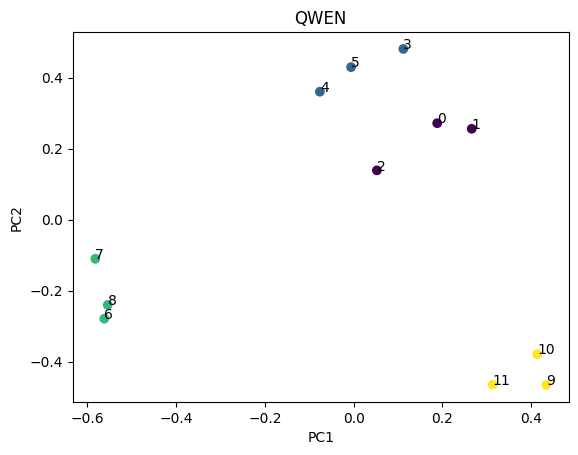

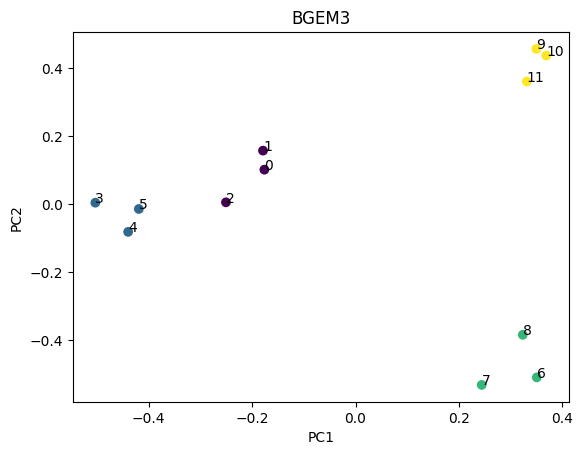

In [ ]:
#plotting
def plot_pca(embeddings, labels, texts, title, n_components=2):
    pca = PCA(n_components=n_components)
    coords = pca.fit_transform(embeddings)

    plt.figure()
    plt.scatter(coords[:, 0], coords[:, 1], c=labels)

    for i, _ in enumerate(texts):
        plt.annotate(i, (coords[i, 0], coords[i, 1]))

    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

plot_pca(qwen_embeddings, qwen_reduced_labels, texts, "QWEN")
plot_pca(bgem3_embeddings, bgem3_reduced_labels, texts, "BGEM3")

## Exercise 4: Advanced Inference — Comparing Hugging Face and vLLM Performance

This exercise is intended for **advanced users** who want to understand performance trade-offs between different LLM inference frameworks. You will compare standard Hugging Face–based inference with **vLLM**, a high-throughput inference engine designed for efficient serving of large language models.

The focus is on **speed, throughput, and resource utilization**, rather than model quality.

---

### Setup

- Use the **same model** for both frameworks (e.g. GaMS or another comparable open model).
- Ensure identical hardware and similar settings where possible.
- Disable unnecessary logging and debugging outputs to avoid skewing timings.

---

### Tasks

1. **Select an appropriate dataset (at least 1000 records) from https://huggingface.co/datasets and download it.**
   - You can also use dataset provided in other notebooks.

2. **Baseline: Hugging Face inference**
   - Load appropriate model using the Hugging Face `transformers` library.
   - Run inference for a fixed set of prompts.
   - Measure total generation time.

3. **vLLM inference**
   - Load the same model using vLLM. Consult the notebook on faster inference with vLLM.
   - Use the same prompts and generation parameters.
   - Measure total generation time.

4. **Results comparison**
   - Create a small table comparing both libraries.

---
